In [13]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
import contractions
import matplotlib.pyplot as plt
import seaborn as sns 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
df = pd.read_csv("/home/deeptanshu/Documents/Samsung_prism/filtered_data.csv")

In [15]:
df.head()

,review,rating
0,It's really a fun game,5
1,uninstalling. it was ok but felt like it was c...,2
2,Love this game,4
3,Doesn't update play time. Just downloaded it 3...,1
4,app crashes every time I try to log in. what g...,1


DATA PRE-PROCESSING

In [16]:
df["review"] = df["review"].apply(lambda x: re.sub(r'\.', '', str(x)))

In [17]:
def text_lowercase(text):
    return text.lower()

In [18]:
df['review'] = df['review'].apply(text_lowercase)

In [19]:
df.head(3)

,review,rating
0,it's really a fun game,5
1,uninstalling it was ok but felt like it was co...,2
2,love this game,4


In [20]:
def expand_contractions(text):
    words = text.split()
    expanded_words = []
    for word in words:
        expanded_words.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [21]:
df['review'] = df['review'].apply(expand_contractions)

In [22]:
df.head(3)

,review,rating
0,it is really a fun game,5
1,uninstalling it was ok but felt like it was co...,2
2,love this game,4


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   review  500000 non-null  object
 1   rating  500000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


In [24]:
text_1 = df["review"][0]

In [25]:
text_1

'it is really a fun game'

In [26]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/deeptanshu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
def tokenizer(text):
    return word_tokenize(text)

In [28]:
tokenizer(text_1)

['it', 'is', 'really', 'a', 'fun', 'game']

In [29]:
df['review'] = df['review'].apply(tokenizer)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   review  500000 non-null  object
 1   rating  500000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


In [31]:
df.head()

,review,rating
0,"[it, is, really, a, fun, game]",5
1,"[uninstalling, it, was, ok, but, felt, like, i...",2
2,"[love, this, game]",4
3,"[does, not, update, play, time, just, download...",1
4,"[app, crashes, every, time, i, try, to, log, i...",1


In [32]:
df["rating"].unique()

array([5, 2, 4, 1, 3])

/tmp/ipykernel_14645/2121359059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


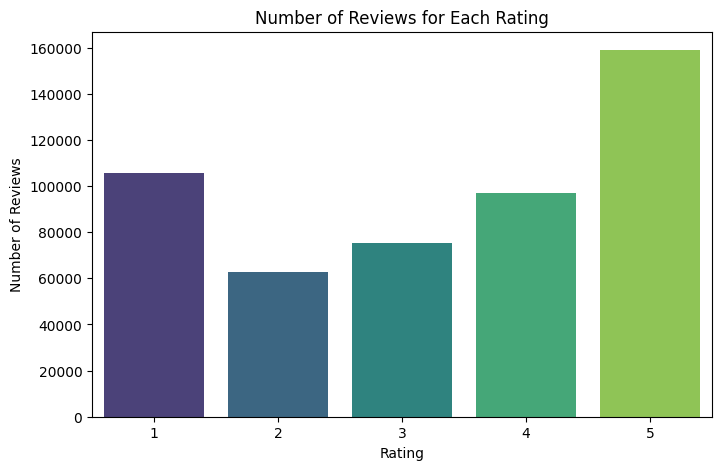

In [33]:
if 'rating' in df.columns:
    rating_counts = df['rating'].value_counts().sort_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
    plt.title('Number of Reviews for Each Rating')
    plt.xlabel('Rating')
    plt.ylabel('Number of Reviews')
    plt.show()



In [34]:
df.head()

,review,rating
0,"[it, is, really, a, fun, game]",5
1,"[uninstalling, it, was, ok, but, felt, like, i...",2
2,"[love, this, game]",4
3,"[does, not, update, play, time, just, download...",1
4,"[app, crashes, every, time, i, try, to, log, i...",1


In [35]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/deeptanshu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/deeptanshu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
def preprocess_text(text):
    # Initialize lemmatizer and stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Check if input is a list (i.e., already tokenized)
    if isinstance(text, list):
        tokens = text
    else:
        # Tokenize if input is a string
        tokens = text.split()
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return ' '.join(tokens)

# Apply the function to the 'review' column
df['review'] = df['review'].apply(preprocess_text)

In [38]:
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else (0 if x == 3 else -1))

MULTINOMIAL NAIVE BIAS

In [27]:

# Initialize CountVectorizer with a maximum of 1500 features
cv = CountVectorizer(max_features=1500)

# Fit and transform the 'review' column
X = cv.fit_transform(df['review']).toarray()

# Get the target values (ratings)
y = df['rating'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model (using Naive Bayes as an example)
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.48533333333333334

Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.63      0.57     31778
           2       0.31      0.12      0.17     19004
           3       0.31      0.18      0.23     22389
           4       0.38      0.23      0.29     28954
           5       0.54      0.83      0.65     47875

    accuracy                           0.49    150000
   macro avg       0.41      0.40      0.38    150000
weighted avg       0.44      0.49      0.44    150000



In [28]:
# Function to classify a new review
def classify_review(review):
    # Step 1: Transform the new review using the fitted CountVectorizer
    review_vector = cv.transform([review]).toarray()  # Transform to the same feature space

    # Step 2: Use the trained Naive Bayes model to predict
    prediction = model.predict(review_vector)

    # Step 3: Get the prediction probability
    prediction_proba = model.predict_proba(review_vector)

    # Return the sentiment and probability of the predicted class
    sentiment = "Positive" if prediction == 1 else "Negative"
    probability = prediction_proba[0][1] if prediction == 1 else prediction_proba[0][0]
    
    return sentiment, probability

# Test the classifier with a new review
test_review = "This game is really fun and engaging!"

# Call the function to get the sentiment and probability
predicted_sentiment = classify_review(test_review)

# Output the results
print(f"\nTest Review: '{test_review}'")
print(f"Predicted Sentiment: {predicted_sentiment}")



Test Review: 'This game is really fun and engaging!'
Predicted Sentiment: ('Negative', 0.0028791851607754804)


RANDOM FOREST CLASSIFIER

In [52]:
# Train Word2Vec model
model = Word2Vec(sentences=df['review'], vector_size=100, window=5, min_count=1, workers=4)

# Function to create document vectors
def document_vector(doc):
    doc = [word for word in doc if word in model.wv.key_to_index]
    return np.mean(model.wv[doc], axis=0) if doc else np.zeros(100)

# Create document vectors
df['doc_vector'] = df['review'].apply(document_vector)

In [30]:

# Prepare features and target
X = np.array(df['doc_vector'].tolist())
y = df['sentiment'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.59152

Classification Report:
              precision    recall  f1-score   support

          -1       0.54      0.50      0.52     50782
           0       0.33      0.02      0.04     22389
           1       0.62      0.82      0.70     76829

    accuracy                           0.59    150000
   macro avg       0.50      0.45      0.42    150000
weighted avg       0.55      0.59      0.54    150000



In [31]:
# Example: Classify a new review
def classify_review(review):
    vec = document_vector(review)
    sentiment = rf.predict([vec])[0]
    return "Positive" if sentiment == 1 else "Negative"

# Test the classifier
test_review = "This game is really fun and engaging!"
print(f"\nTest Review: '{test_review}'")
print(f"Predicted Sentiment: {classify_review(test_review)}")



Test Review: 'This game is really fun and engaging!'
Predicted Sentiment: Positive


LOGISTIC REGRESSION

In [32]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42)

#
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('logreg', LogisticRegression(max_iter=1000))
])

param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'logreg__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluate the model
y_pred = grid_search.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Accuracy: 0.7187933333333333

Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.75      0.72     50782
           0       0.43      0.05      0.09     22389
           1       0.74      0.89      0.81     76829

    accuracy                           0.72    150000
   macro avg       0.62      0.56      0.54    150000
weighted avg       0.68      0.72      0.67    150000



In [33]:
def classify_review(review):
    
    # Predict the sentiment
    prediction = grid_search.predict([review])[0]
    
    # Get the confidence (probability of the predicted class)
    probability = np.max(grid_search.predict_proba([review]))
    
    # Determine sentiment based on prediction
    sentiment = "Positive" if prediction == 1 else "Negative"
    
    # Return sentiment and confidence score formatted to 2 decimal places
    return f"Sentiment: {sentiment}, Confidence: {probability:.2f}"

# Test the classifier with a single review string
test_review = "This game is absolutely fantastic! I love every aspect of it."

print(f"\nReview: '{test_review}'")
print(classify_review(test_review))


Review: 'This game is absolutely fantastic! I love every aspect of it.'
Sentiment: Positive, Confidence: 0.90


LINEAR SVM

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42)

# Create a pipeline using LinearSVC with CalibratedClassifierCV for probability estimates
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('svc', CalibratedClassifierCV(LinearSVC()))
])

# Set up parameters for grid search
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svc__estimator__C': [0.1, 1, 10]  # Correct parameter for setting C in LinearSVC
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the model
y_pred = grid_search.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'svc__estimator__C': 0.1, 'tfidf__ngram_range': (1, 2)}

Accuracy: 0.7173333333333334

Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.74      0.72     50782
           0       0.42      0.06      0.11     22389
           1       0.74      0.89      0.81     76829

    accuracy                           0.72    150000
   macro avg       0.62      0.57      0.55    150000
weighted avg       0.68      0.72      0.67    150000



In [35]:
def classify_review(review):
    
    # Predict the sentiment
    prediction = grid_search.predict([review])[0]
    
    # Get the confidence (probability of the predicted class)
    probability = np.max(grid_search.predict_proba([review]))
    
    # Determine sentiment based on prediction
    sentiment = "Positive" if prediction == 1 else "Negative"
    
    # Return sentiment and confidence score formatted to 2 decimal places
    return f"Sentiment: {sentiment}, Confidence: {probability:.2f}"

# Test the classifier with a single review string
test_review = "This game is absolutely fantastic! I love every aspect of it."

print(f"\nReview: '{test_review}'")
print(classify_review(test_review))


Review: 'This game is absolutely fantastic! I love every aspect of it.'
Sentiment: Positive, Confidence: 0.87


In [36]:
# Calculate review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))  # or len(x) for character length

# Correlation with sentiment score (assuming sentiment_score column exists)
correlation = df['review_length'].corr(df['sentiment'], method='pearson')  # or method='spearman'
print(correlation)


-0.15458902183467904


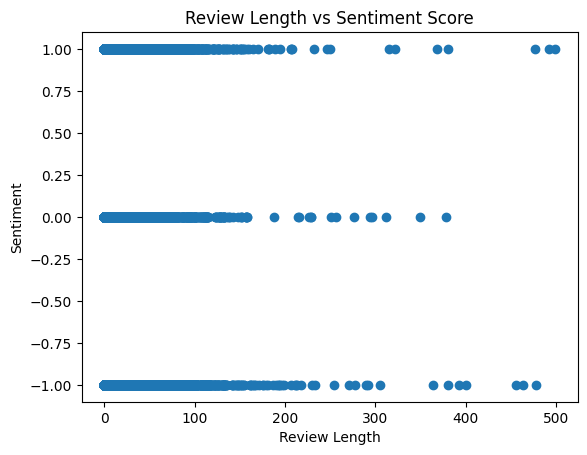

In [37]:
import matplotlib.pyplot as plt

plt.scatter(df['review_length'], df['sentiment'])
plt.xlabel('Review Length')
plt.ylabel('Sentiment')
plt.title('Review Length vs Sentiment Score')
plt.show()


LSTM

In [53]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Stack the document vectors into a NumPy array
X = np.stack(df['doc_vector'].values)

# One-hot encode the sentiment labels (3 classes: -1, 0, 1)
y = to_categorical(df['sentiment'], num_classes=3)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple feedforward neural network
model = Sequential([
    Dense(128, input_shape=(100,), activation='relu'),  # Input shape matches document vector size (100)
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer for 3-class classification
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.1, 
                    callbacks=[early_stopping])


/home/deeptanshu/Documents/Samsung_prism/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


2024-10-02 18:06:12.618790: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 144000000 exceeds 10% of free system memory.


11250/11250 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.1694 - loss: 0.4197 - val_accuracy: 0.2717 - val_loss: 0.1602
Epoch 2/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.2550 - loss: 0.0157 - val_accuracy: 0.2764 - val_loss: -0.7873
Epoch 3/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.2778 - loss: -1.4211 - val_accuracy: 0.2636 - val_loss: -3.7601
Epoch 4/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.2864 - loss: -5.3760 - val_accuracy: 0.2796 - val_loss: -10.6982
Epoch 5/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.2822 - loss: -14.4871 - val_accuracy: 0.2956 - val_loss: -23.0885
Epoch 6/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.2815 - loss: -29.5686 - val_accuracy: 0.2770 - val_loss: -42.4223
Epoch 7/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 11s 962us/step - accuracy: 0.2776 - loss: -53.4480 - val_accuracy: 0.2555 - val_loss: -70.6911
Epoch 8/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - a

In [54]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0
